<a href="https://colab.research.google.com/github/ktb702/AI260/blob/main/Ch3/Ch3_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

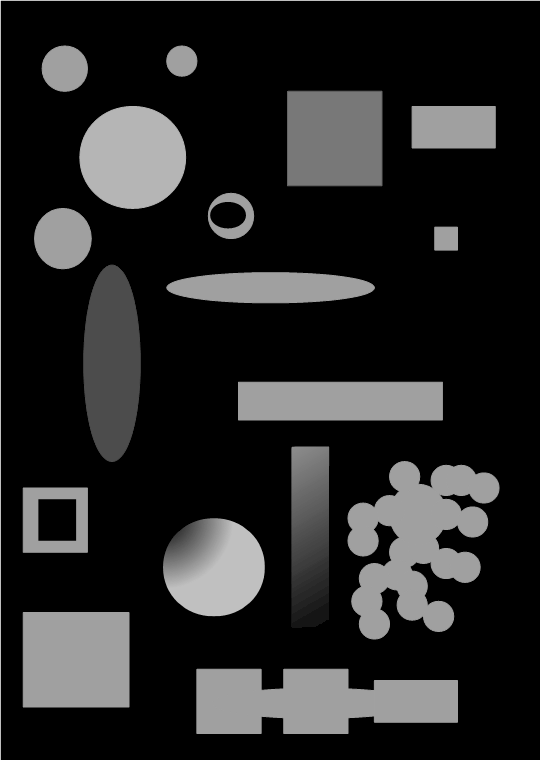

In [3]:
bw = cv2.imread('detect_blob.png', 0) # 0 specifies greyscale
height, width = bw.shape[0:2] # only want first 2 values of the shape
cv2_imshow(bw)


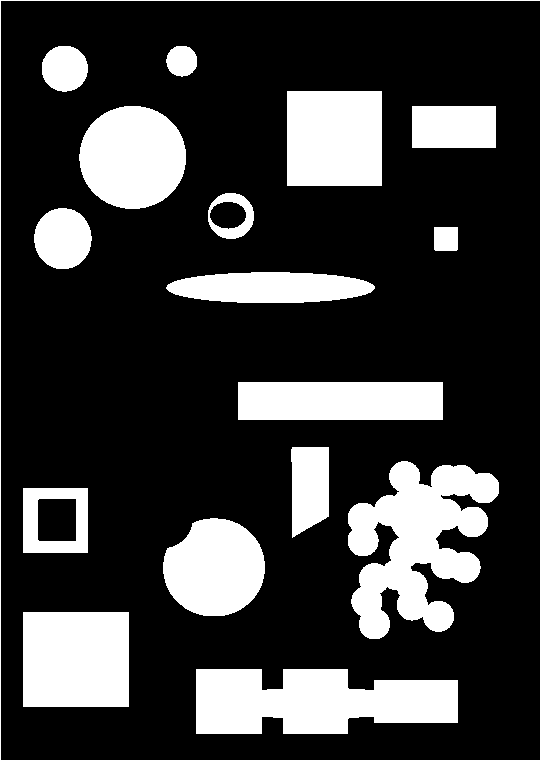

In [11]:
binary = np.zeros([height, width, 1], 'uint8')

thresh = 80

for row in range(0, height):
  for col in range(0, width):
    if bw[row][col] > thresh:
      binary[row][col] = 255

cv2_imshow(binary)

# some shapes from the original image aren't visible because all of their values were below the threshold
# and some shapes are cutoff because of the values in the gradient being less than the threshold.

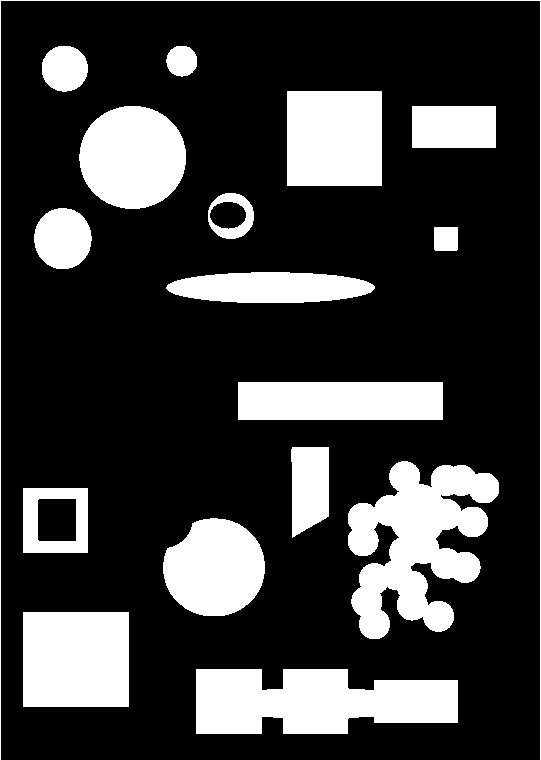

In [16]:
# passing the input array, the threshold value, the max value (255), and the type of thresholding.
# there are several types of thresholding available.

thresh = 80.0 # must be a double!
ret, thresh = cv2.threshold(bw, thresh, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [17]:
############################
## ADAPTIVE THRESHOLDING ###
############################

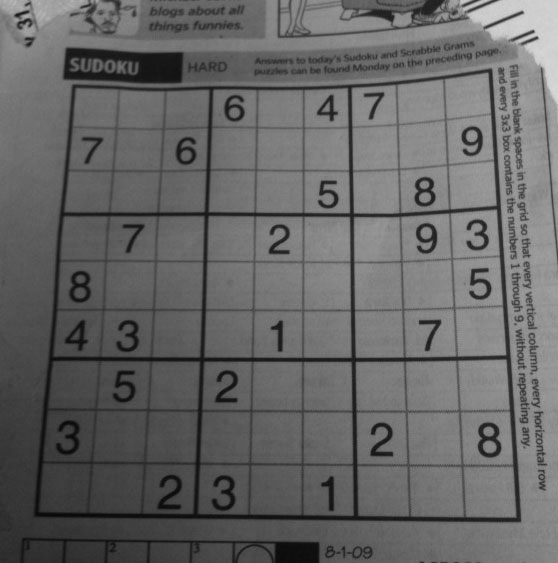

In [20]:
# Adaptive thresholding is more effective when there is uneven lighting in an image.
# Instead of taking a single threshold value, it will look at the neighboring pixels and determing the local threshold.

# Typically we only work with black and white images when segmenting
img = cv2.imread('sudoku.png',0)
cv2_imshow(img)

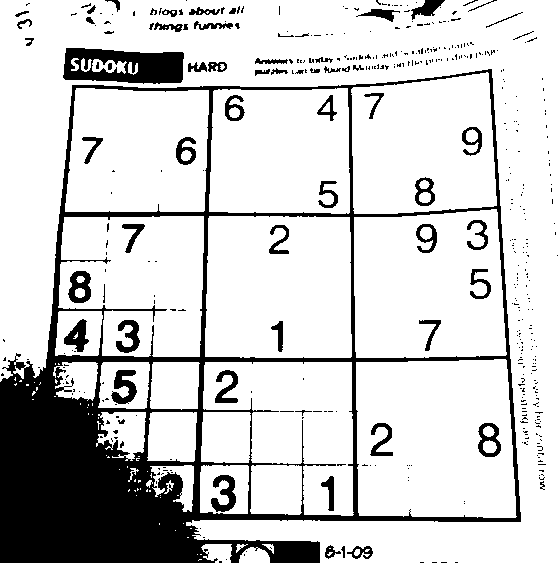

In [21]:
ret, thresh_basic = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh_basic)

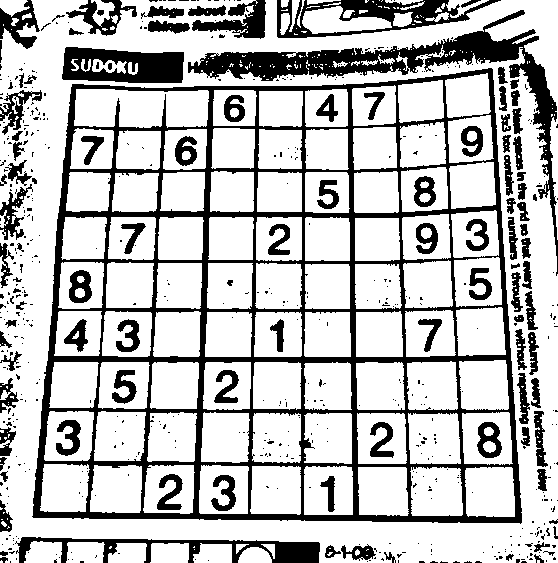

In [22]:
# create adaptive threshold
# adaptive threshold only returns one value (output array), unlike single thresholding
# parameters are input array, max value, thresholding flags, neighborhood param, and mean subtraction from the end result
# neighborhood parameter indicates how far or the area over which the adapative thresholding will occur
thresh_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2_imshow(thresh_adapt)

In [23]:
# can you erosion and dilation function to remove the rest of the noise

In [24]:
####################
## FACE DETECTION ##
####################

In [ ]:
img = cv2.imread('faces.jpeg')
cv2_imshow(img)

In [ ]:
# first step is to split into HSV format
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0] # all of the hue channels
s = hsv[:,:,1] # all of the saturation channels
v = hsv[:,:,2] # all of the value channels

hsv_split = np.concatenate((h,s,v), axis=1) # concat horizontally
cv2_imshow(hsv_split)

In [10]:
# hue (left) - the colors are represented on a continuous wheel/loop where one color transitions into the next and red wraps around
#    from 255 to 0, so very high and very low numbers are considered red. This is different from the RGB/BGR color space where colors
#    are represented in a linear fashion. Blue and green are more in the middle, so they account for the more grey pixels in the hue split.

In [ ]:
# parameters are input array(saturation channel), threshold value (40), max value (255), threshold flag
# so this means that any pixel in the saturation channel with a value greater than or equal to 40 will be white.
ret, min_sat = cv2.threshold(s, 40, 255, cv2.THRESH_BINARY)
cv2_imshow(min_sat)

In [ ]:
# parameters are input array (hue), threshold (15), value(255), threshold flag (in this case we are going to the the inverse)
# The inverse in this case means that any value between 0 and 15 will become white instead of the other way around.
ret, max_hue = cv2.threshold(h, 15, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(max_hue)

In [ ]:
# now we can combine the filters together
final = cv2.bitwise_and(min_sat, max_hue)
cv2_imshow(final)

In [18]:
##############################
## CONTOUR OBJECT DETECTION ##
##############################

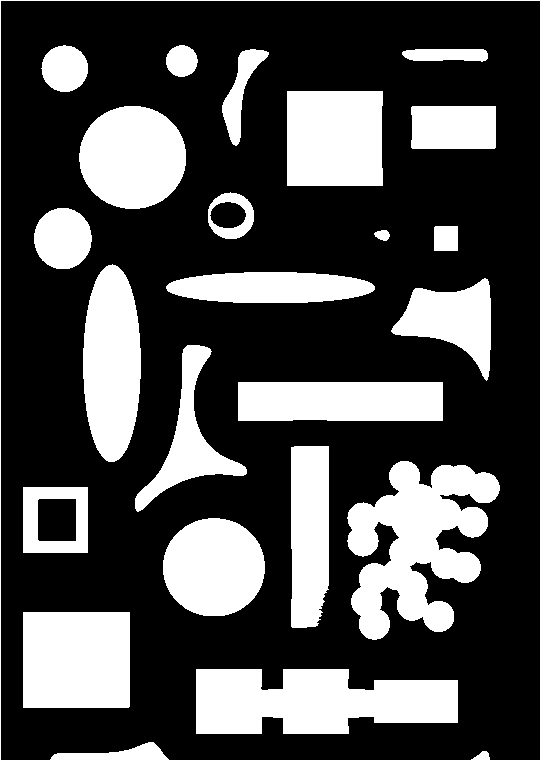

In [3]:
img = cv2.imread('detect_blob.png', 1)

# contours only work with binary images that's why you have to convert to greyscale.
# the end result is the same whether you read in an image as grayscale, or whether you read it as a color image and then convert to greyscale (like in this example)
# If you read it in as greyscale, it will be a single channel greyscale image, whereas this approach reads the image as a 3 color channel image so it preserves the
#    color channels in case you want to process them later. If you only need greyscale then this step is not necessary.
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

cv2_imshow(thresh)

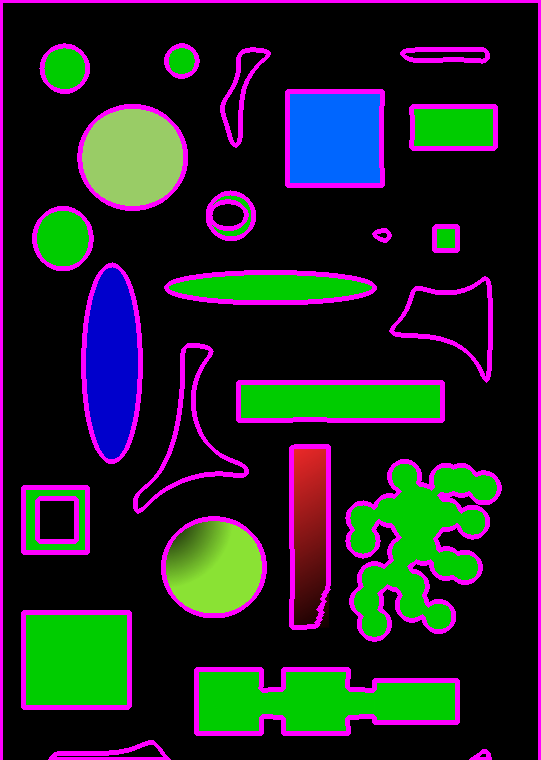

In [5]:
# the first output (contours) is a list of contours (which is a list of points that describe the perimeter of an object)
# the second output (hierarchy) is a parent-child relationship of all the contours.
# If one contour is enclosed by another contour, that's considered a child

# RETR_TREE defines the type of hierarchy and how it's structured.
# CHAIN_APPROX_SIMPLE tells the method to simplify the points in the contours output, keeping only key points that define the structure (like 3 pts for a triangle)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# make a deep copy
img2 = img.copy()

# specify the index of the contour that you want to draw. -1 means draw them all.
index = -1
thickness = 4 # thickness of the lines drawn
color = (255,0,255) # make it pink

cv2.drawContours(img2, contours, index, color, thickness)

cv2_imshow(img2)

In [4]:
###########################################
## AREA, PERIMETER, CENTER AND CURVATURE ##
###########################################

Area: 86.5, perimeter: 45.55634891986847
Area: 959.5, perimeter: 251.8406196832657
Area: 13091.5, perimeter: 754.0416301488876
Area: 10069.5, perimeter: 401.41421353816986
Area: 7780.0, perimeter: 329.22034430503845
Area: 4160.0, perimeter: 258.0
Area: 1672.0, perimeter: 160.48528122901917
Area: 14515.0, perimeter: 1225.768675327301
Area: 6357.0, perimeter: 446.9116872549057
Area: 7718.0, perimeter: 484.8284270763397
Area: 4592.5, perimeter: 502.0315263271332
Area: 5014.0, perimeter: 357.2792183160782
Area: 5019.0, perimeter: 444.3675308227539
Area: 8829.0, perimeter: 450.5929263830185
Area: 108.0, perimeter: 41.79898953437805
Area: 551.5, perimeter: 93.41421353816986
Area: 2707.5, perimeter: 194.75230765342712
Area: 1644.5, perimeter: 152.1248904466629
Area: 767.0, perimeter: 105.74011433124542
Area: 3501.5, perimeter: 251.0710676908493
Area: 8556.0, perimeter: 345.70562493801117
Area: 8868.0, perimeter: 378.8284270763397
Area: 865.0, perimeter: 185.4558435678482
Area: 1482.0, perimet

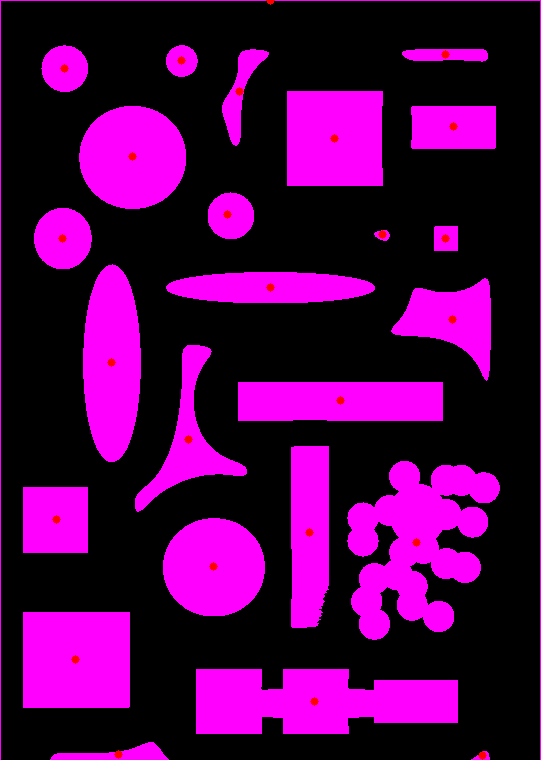

In [7]:
# create a blank array (all 0) with the width, height, and 3 color channels
objects = np.zeros([img.shape[0], img.shape[1], 3], 'uint8')
for c in contours:
  # parameters: our objects array, list of contours, -1 to draww all the contours,
  #    color, and another -1 to indicate that we want to completely fill the contours in
  #    instead of just drawing an outline.
  cv2.drawContours(objects, [c], -1, color, -1)

  # area is calculated by pixels inside the contour, returns pixels squared.
  area = cv2.contourArea(c)
  # passing True means that the arc is fully enclosed, which is always true for contours.
  perimeter = cv2.arcLength(c, True)

  # moments are a standard way to determine centers of mass
  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.circle(objects, (cx, cy), 4, (0,0,255), -1)

  print(f'Area: {area}, perimeter: {perimeter}')

cv2_imshow(objects)
